In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [14]:
#/content/2019.csv
# 1. Load and clean data
df = pd.read_csv("/content/2019.csv")
df = df.dropna()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


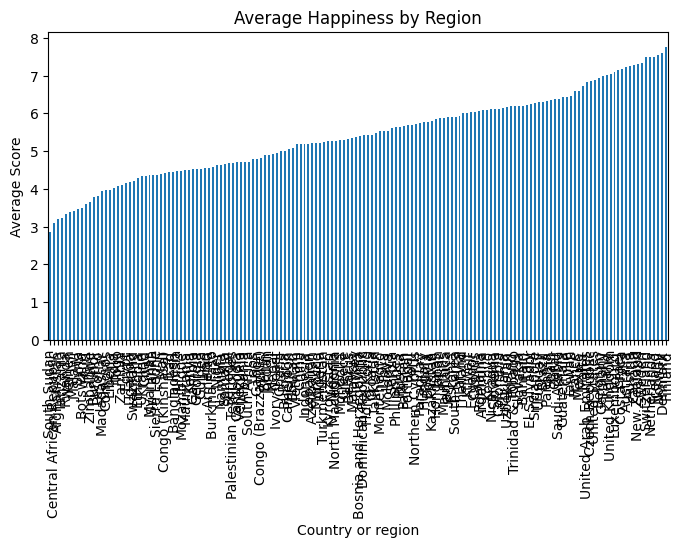

In [15]:
region_avg = df.groupby("Country or region")["Score"].mean().sort_values()
region_avg.plot(kind="bar", figsize=(8,4), title="Average Happiness by Region")
plt.ylabel("Average Score")
plt.show()


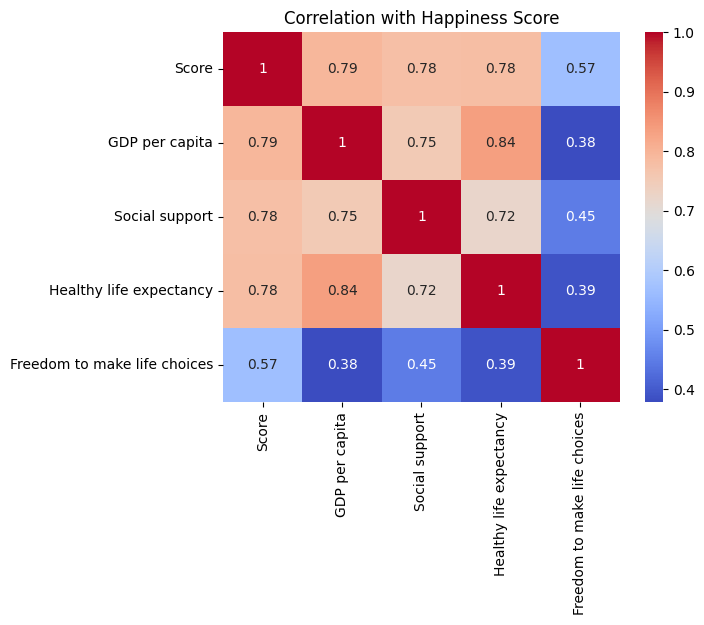

In [16]:
# 3. Correlation analysis
corr = df[["Score","GDP per capita","Social support",
           "Healthy life expectancy","Freedom to make life choices"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation with Happiness Score")
plt.show()

In [17]:
# 4. Simple linear regression
X = df[["GDP per capita","Healthy life expectancy","Freedom to make life choices"]]
y = df["Score"]
model = LinearRegression().fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", model.score(X, y))

Coefficients: [1.17809478 1.45775528 2.19933556]
Intercept: 2.4201247254754836
R^2: 0.7424815783461145


/tmp/ipython-input-2694797366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="Country or region", data=top10, palette="viridis")


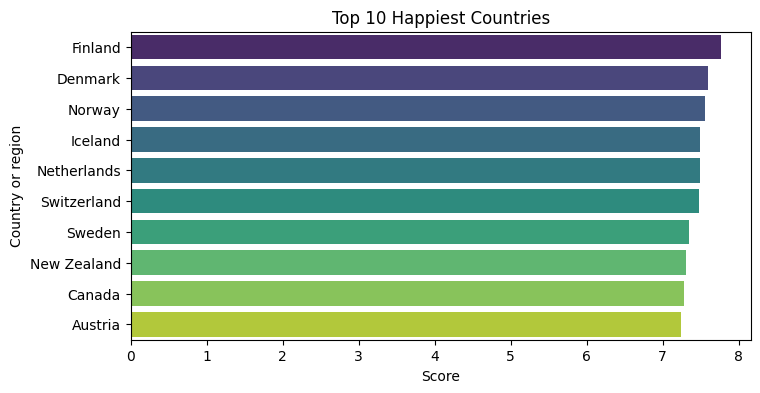

/tmp/ipython-input-2694797366.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="Country or region", data=bottom10, palette="magma")


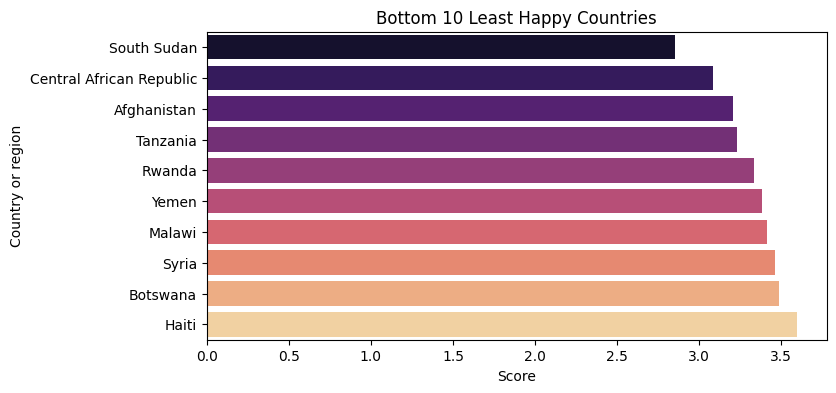

In [18]:
# 5. Top 10 happiest and least happy countries
top10 = df.nlargest(10, "Score")
bottom10 = df.nsmallest(10, "Score")

plt.figure(figsize=(8,4))
sns.barplot(x="Score", y="Country or region", data=top10, palette="viridis")
plt.title("Top 10 Happiest Countries")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Score", y="Country or region", data=bottom10, palette="magma")
plt.title("Bottom 10 Least Happy Countries")
plt.show()